In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

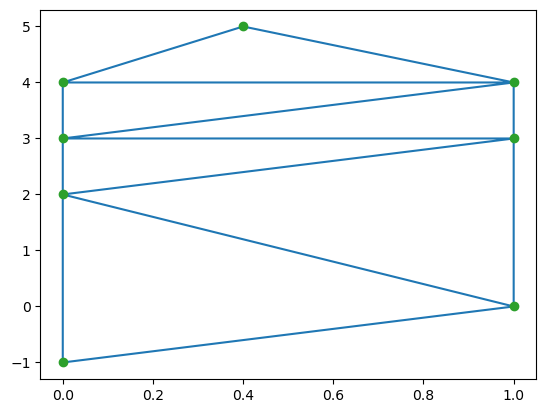

In [721]:
points = np.array([[0, -1], [0, 2], [0, 3], [0, 4], [0.4, 5], [1,4], [1,3], [1,0]])
tri = Delaunay(points)

plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

In [146]:
points

array([[0. , 1. ],
       [0. , 2. ],
       [0. , 3. ],
       [0. , 4. ],
       [0.4, 5. ],
       [1. , 4. ],
       [1. , 3. ],
       [1. , 0. ]])

In [82]:
L = 10
h = 1
N = int(L/h)
x = np.arange(0,L,h)
y = np.zeros((N))
points = np.zeros((2,N))
points[1,:] = x[:]
points[0,:] = y[:]
(points)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [106]:
points

array([[0, 1],
       [0, 2],
       [0, 3],
       [0, 4],
       [1, 5],
       [1, 4],
       [1, 3],
       [1, 2]])

In [115]:
L = 10
h = 1
N = int(L/h)
x1 = np.arange(0,L/2,h)
x2 = np.arange(-L/2,0,h) 
y1 = np.zeros((int(N/2)))
y2 = np.ones((int(N/2)))
points = np.zeros((2,N))
points[1,:-int(N/2)] = x1[:]
points[1,int(N/2):] = -x2[:]
points[0,:-int(N/2)] = y1[:]
points[0,int(N/2):] = y2[:]
(points.T)

array([[0., 0.],
       [0., 1.],
       [0., 2.],
       [0., 3.],
       [0., 4.],
       [1., 5.],
       [1., 4.],
       [1., 3.],
       [1., 2.],
       [1., 1.]])

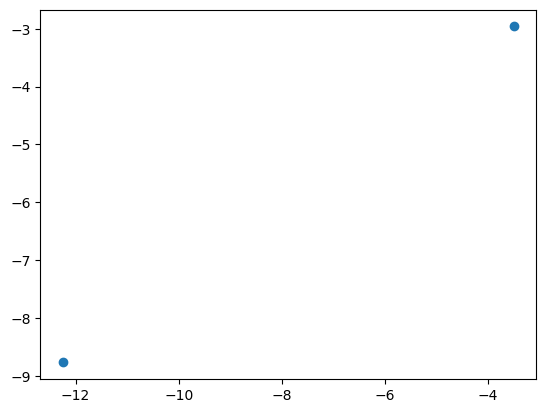

In [123]:
# tri = Delaunay(points.T)

# plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

In [727]:
L = 4
h = 0.4
N = int(L/h)
x = np.linspace(-L/2,L/2,N)
y = -x**2+4
points = np.zeros((2*N, 2))
for i in range(0,2*N):
    if i < N:
        points[i, 0] = x[i]
        points[i, 1] = y[i]
    else:
        points[i, 0] = -x[i-int(N)]
        points[i, 1] = 0







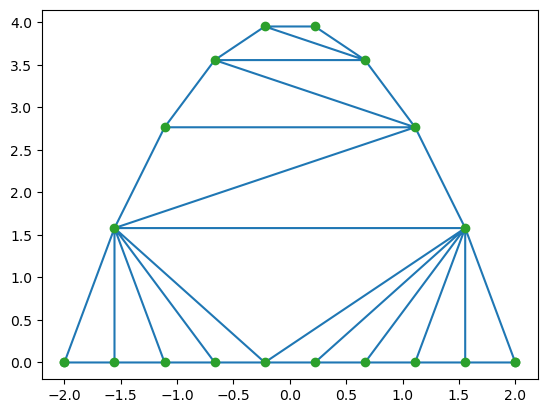

In [728]:
tri = Delaunay(points)

plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

Прямоугольная область

In [694]:
L = 4 #магические числа?
h = 1
N = int(L/h+1)
x = np.linspace(0,L,N)
y = np.linspace(0,L,N)

In [695]:
points = np.zeros((N**2, 2))
for i in range(0, N):
    for j in range(0, N):
        points[i*N + j, 0] = x[i]
        if i % 2 == 0:  
            points[j+i*N, 1] = y[N-j-1]
        else:
            points[j+i*N, 1] = y[j] 

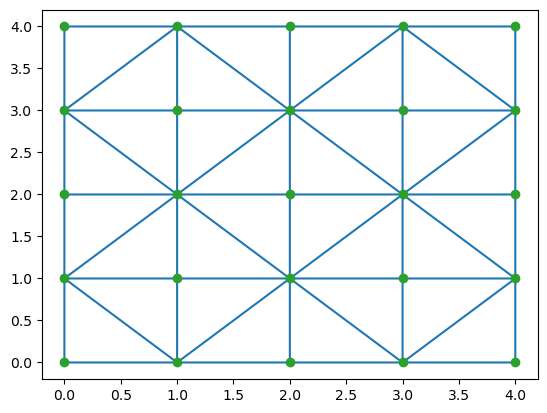

In [696]:
tri = Delaunay(points)

plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

криволинейная область

In [362]:
"""граница"""
def R(x, y):
    return np.sqrt(x**2 + y**2)

In [717]:
L = 2/2
r_n = 1
h = 1
N = int(L/h+1)
x = np.linspace(-L/2,L/2,N)
y = np.linspace(-L/2,L/2,N)
t = np.linspace(0,2*np.pi,N)

In [718]:
points = np.zeros((N**2, 2))
for i in range(0, N):
    for j in range(0, N):
        if R(x[i], y[N-j-1]) >= r_n and R(x[i], y[N-j-1]) <= L:
            points[i*N + j, 0] = x[i]
            points[j+i*N, 1] = y[N-j-1]
        elif R(x[i], y[N-j-1]) < r_n:
            points[i*N + j, 0] = r_n*np.cos(t[i])
            points[j+i*(N), 1] = r_n*np.sin(t[N-j-1])
        elif R(x[i], y[N-j-1]) > L:   
            points[i*N + j, 0] = L*np.cos(t[i])
            points[j+i*N, 1] = L*np.sin(t[N-j-1])


In [719]:
tri = Delaunay(points)

plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

QhullError: QH6013 qhull input error: input is less than 3-dimensional since all points have the same x coordinate    1

While executing:  | qhull d Qc Qt Qz Q12 Qbb
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 109428395  delaunay  Qcoplanar-keep  Qtriangulate  Qz-infinity-point
  Q12-allow-wide  Qbbound-last  _pre-merge  _zero-centrum  Qinterior-keep
  Pgood  _max-width 2.4e-16  Error-roundoff 1.4e-15  _one-merge 9.7e-15
  Visible-distance 2.8e-15  U-max-coplanar 2.8e-15  Width-outside 5.5e-15
  _wide-facet 1.7e-14  _maxoutside 1.1e-14


In [661]:
L = 4
r_n = L/2
h = 1/8
N = int(L/h+1)
t = np.linspace(0,2*np.pi,N)

In [662]:
points = np.zeros((N, 2))

In [675]:
for i in range(0, N):
    if i % 2 == 0: 
        points[i,0] = L*np.cos(t[i])
        points[i,1] = L*np.sin(t[i])
    else:
        points[i,0] = r_n*np.cos(t[i])
        points[i,1] = r_n*np.sin(t[i])

In [676]:
points

array([[ 4.00000000e+00,  0.00000000e+00],
       [ 1.96157056e+00,  3.90180644e-01],
       [ 3.69551813e+00,  1.53073373e+00],
       [ 1.66293922e+00,  1.11114047e+00],
       [ 2.82842712e+00,  2.82842712e+00],
       [ 1.11114047e+00,  1.66293922e+00],
       [ 1.53073373e+00,  3.69551813e+00],
       [ 3.90180644e-01,  1.96157056e+00],
       [ 2.44929360e-16,  4.00000000e+00],
       [-3.90180644e-01,  1.96157056e+00],
       [-1.53073373e+00,  3.69551813e+00],
       [-1.11114047e+00,  1.66293922e+00],
       [-2.82842712e+00,  2.82842712e+00],
       [-1.66293922e+00,  1.11114047e+00],
       [-3.69551813e+00,  1.53073373e+00],
       [-1.96157056e+00,  3.90180644e-01],
       [-4.00000000e+00,  4.89858720e-16],
       [-1.96157056e+00, -3.90180644e-01],
       [-3.69551813e+00, -1.53073373e+00],
       [-1.66293922e+00, -1.11114047e+00],
       [-2.82842712e+00, -2.82842712e+00],
       [-1.11114047e+00, -1.66293922e+00],
       [-1.53073373e+00, -3.69551813e+00],
       [-3.

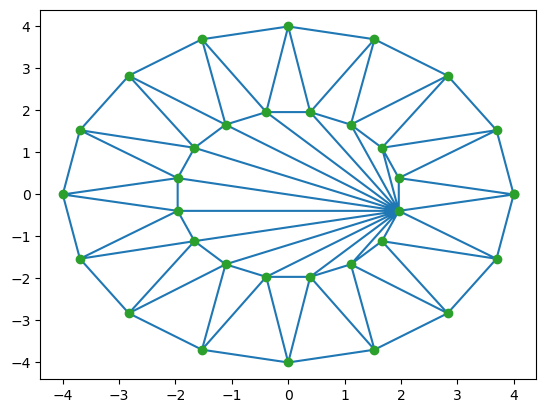

In [677]:
tri = Delaunay(points)

plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

In [755]:
tri.simplices

array([[18,  1,  0],
       [16, 15,  1],
       [13,  8, 14],
       [ 8, 13, 12],
       [11,  8, 12],
       [ 8, 11,  9],
       [17, 16,  1],
       [18, 17,  1],
       [ 8, 15, 14],
       [15,  8,  1],
       [ 3,  6,  4],
       [ 6,  5,  4],
       [ 8,  7,  1],
       [ 7,  2,  1],
       [ 7,  6,  3],
       [ 2,  7,  3]], dtype=int32)

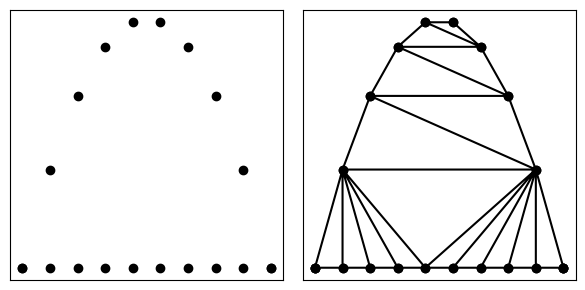

In [736]:
A = dict(vertices=points)
B = tr.triangulate(A) #note that the origin uses 'qpa0.05' here
tr.compare(plt, A, B)
plt.show()

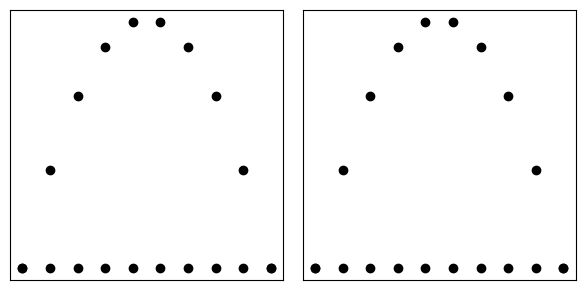

In [752]:

A = dict(vertices=points)
B = tr.triangulate(A, 'qpa0.05')
tr.compare(plt, A, B)
plt.show()

In [734]:
B

{'vertices': array([[-2.        ,  0.        ],
        [-1.55555556,  1.58024691],
        [-1.11111111,  2.7654321 ],
        [-0.66666667,  3.55555556],
        [-0.22222222,  3.95061728],
        [ 0.22222222,  3.95061728],
        [ 0.66666667,  3.55555556],
        [ 1.11111111,  2.7654321 ],
        [ 1.55555556,  1.58024691],
        [ 2.        ,  0.        ],
        [ 2.        ,  0.        ],
        [ 1.55555556,  0.        ],
        [ 1.11111111,  0.        ],
        [ 0.66666667,  0.        ],
        [ 0.22222222,  0.        ],
        [-0.22222222,  0.        ],
        [-0.66666667,  0.        ],
        [-1.11111111,  0.        ],
        [-1.55555556,  0.        ],
        [-2.        ,  0.        ]]),
 'vertex_markers': array([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
 

In [739]:
def circle(N, R):
    i = np.arange(N)
    theta = i * 2 * np.pi / N
    pts = np.stack([np.cos(theta), np.sin(theta)], axis=1) * R
    seg = np.stack([i, i + 1], axis=1) % N
    return pts, seg




In [740]:
pts0, seg0 = circle(30, 1.4)
pts1, seg1 = circle(16, 0.6)
pts = np.vstack([pts0, pts1])
seg = np.vstack([seg0, seg1 + seg0.shape[0]])
pts

array([[ 1.40000000e+00,  0.00000000e+00],
       [ 1.36940664e+00,  2.91076367e-01],
       [ 1.27896364e+00,  5.69431300e-01],
       [ 1.13262379e+00,  8.22899353e-01],
       [ 9.36782849e-01,  1.04040276e+00],
       [ 7.00000000e-01,  1.21243557e+00],
       [ 4.32623792e-01,  1.33147912e+00],
       [ 1.46339849e-01,  1.39233065e+00],
       [-1.46339849e-01,  1.39233065e+00],
       [-4.32623792e-01,  1.33147912e+00],
       [-7.00000000e-01,  1.21243557e+00],
       [-9.36782849e-01,  1.04040276e+00],
       [-1.13262379e+00,  8.22899353e-01],
       [-1.27896364e+00,  5.69431300e-01],
       [-1.36940664e+00,  2.91076367e-01],
       [-1.40000000e+00,  7.93175446e-16],
       [-1.36940664e+00, -2.91076367e-01],
       [-1.27896364e+00, -5.69431300e-01],
       [-1.13262379e+00, -8.22899353e-01],
       [-9.36782849e-01, -1.04040276e+00],
       [-7.00000000e-01, -1.21243557e+00],
       [-4.32623792e-01, -1.33147912e+00],
       [-1.46339849e-01, -1.39233065e+00],
       [ 1.

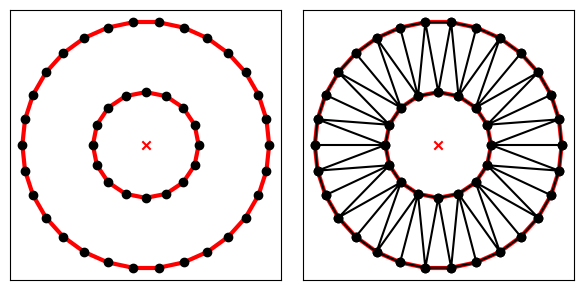

In [866]:

A = dict(vertices=pts, segments=seg, holes=[[0, 0]])
B = tr.triangulate(A, 'p')
tr.compare(plt, A, B)
plt.show()

In [751]:
B

{'vertices': array([[ 1.40000000e+00,  0.00000000e+00],
        [ 1.36940664e+00,  2.91076367e-01],
        [ 1.27896364e+00,  5.69431300e-01],
        [ 1.13262379e+00,  8.22899353e-01],
        [ 9.36782849e-01,  1.04040276e+00],
        [ 7.00000000e-01,  1.21243557e+00],
        [ 4.32623792e-01,  1.33147912e+00],
        [ 1.46339849e-01,  1.39233065e+00],
        [-1.46339849e-01,  1.39233065e+00],
        [-4.32623792e-01,  1.33147912e+00],
        [-7.00000000e-01,  1.21243557e+00],
        [-9.36782849e-01,  1.04040276e+00],
        [-1.13262379e+00,  8.22899353e-01],
        [-1.27896364e+00,  5.69431300e-01],
        [-1.36940664e+00,  2.91076367e-01],
        [-1.40000000e+00,  7.93175446e-16],
        [-1.36940664e+00, -2.91076367e-01],
        [-1.27896364e+00, -5.69431300e-01],
        [-1.13262379e+00, -8.22899353e-01],
        [-9.36782849e-01, -1.04040276e+00],
        [-7.00000000e-01, -1.21243557e+00],
        [-4.32623792e-01, -1.33147912e+00],
        [-1.46339849

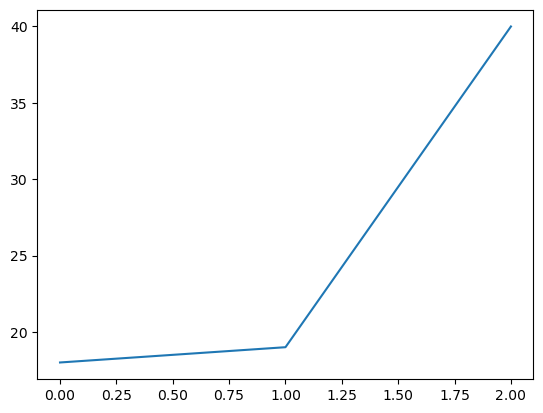

In [749]:
plt.plot(np.array([18, 19, 40]))

In [843]:
R_big = 4
R_litl = 2
N = 20
point_1 = np.zeros((N, 2))
point_2 = np.zeros((N, 2))
t = np.linspace(0, 2*np.pi, N)
point_1[:,0] = R_big*np.cos(t)
point_1[:,1] = R_big*np.sin(t)
point_2[:,0] = R_litl*np.cos(t)
point_2[:,1] = R_litl*np.sin(t)
points = np.vstack([point_1, point_2]) 

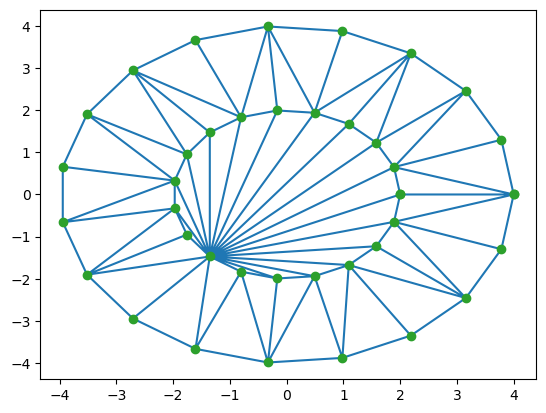

In [789]:
tri = Delaunay(points)
mask = ~np.any(tri.simplices >= len(point_1), axis=1)
triangles = tri.simplices[mask]

plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

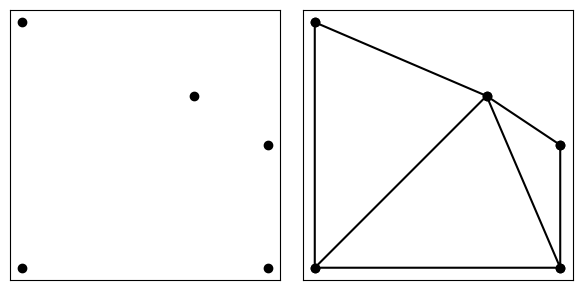

In [838]:
A = dict(vertices=np.array(((0, 0), (1, 0), (0.7, 0.7), (1, 0.5), (0, 1))))
B = tr.triangulate(A, 'q')
tr.compare(plt, A, B)
plt.show()

In [839]:


# Get the lengths and coordinates of edges
edge_lengths = B['edges'][:, 2]  # Lengths of edges
edge_vertices = B['vertices'][B['edges'][:, :2]]  # Coordinates of edge vertices

# Plotting the triangulations
tr.compare(plt, A, B)

# Plot edge lengths
for i, (x, y) in enumerate(edge_vertices):
    plt.text((x[0] + y[0]) / 2, (x[1] + y[1]) / 2, f'{edge_lengths[i]:.2f}', color='red')

plt.show()


KeyError: 'edges'

In [840]:
B['triangles']

array([[4, 0, 2],
       [2, 1, 3],
       [1, 2, 0]], dtype=int32)

Координаты вершин триангуляции:
Вершина 1: (0, 0)
Вершина 2: (1, 0)
Вершина 3: (1, 1)
Вершина 4: (0, 1)

Индексы вершин каждого треугольника:
Треугольник 1: [2 3 1]
Треугольник 2: [1 3 0]


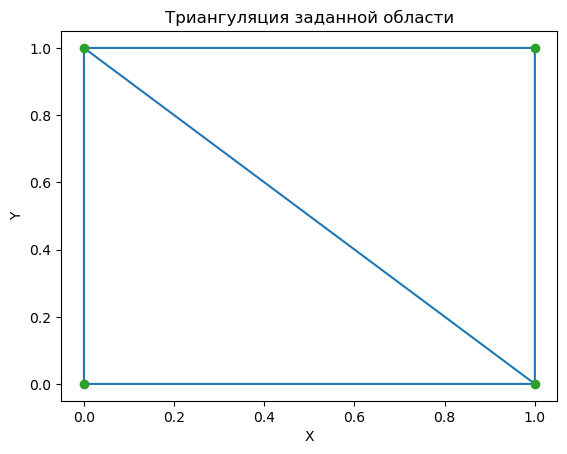

In [852]:
# R_big = 4
# R_litl = 2
# N = 20
# point_1 = np.zeros((N, 2))
# point_2 = np.zeros((N, 2))
# t = np.linspace(0, 2*np.pi, N)
# point_1[:,0] = R_big*np.cos(t)
# point_1[:,1] = R_big*np.sin(t)
# point_2[:,0] = R_litl*np.cos(t)
# point_2[:,1] = R_litl*np.sin(t)
# points = np.vstack([point_1, point_2]) 

# Задаем точки области
points = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])
# points = np.array([[0, 0], [1, 0], [0.5, 1], [0.2, 0.7], [0.8, 0.7],
#                    [0.3, 0.5], [0.7, 0.5], [0.4, 0.2], [0.6, 0.2]])
# Триангуляция Делоне
tri = Delaunay(points)

# Выводим координаты вершин
print("Координаты вершин триангуляции:")
for i, vert in enumerate(points):
    print(f"Вершина {i + 1}: ({vert[0]}, {vert[1]})")

# Выводим индексы вершин каждого треугольника
print("\nИндексы вершин каждого треугольника:")
for i, simplex in enumerate(tri.simplices):
    print(f"Треугольник {i + 1}: {simplex}")

# Отображение триангуляции
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Триангуляция заданной области')
plt.show()


In [863]:
square_points = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])

# Задаем точки внутреннего квадрата со стороной 0.5
inner_square_points = np.array([[0.25, 0.25], [0.75, 0.25], [0.75, 0.75], [0.25, 0.75]])

points = np.concatenate((square_points, inner_square_points))

# Задаем индексы точек, образующих внутренний квадрат
inner_square_indices = [4, 5, 6, 7]

# Удаляем внутренний квадрат из триангуляции
tri = Delaunay(points)
tri.simplices = np.array([simplex for simplex in tri.simplices if not np.any(np.isin(simplex, inner_square_indices))])


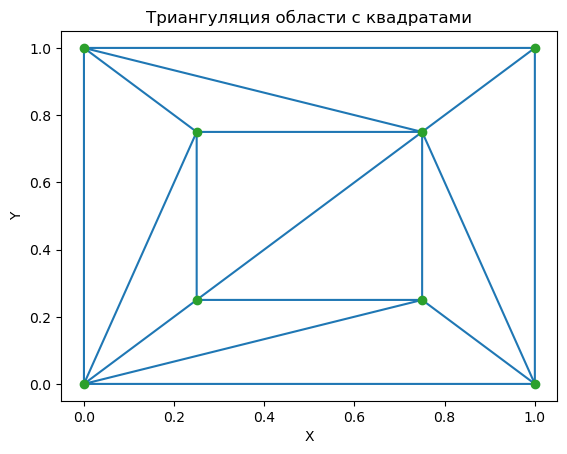

In [865]:
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Триангуляция области с квадратами')
plt.show()

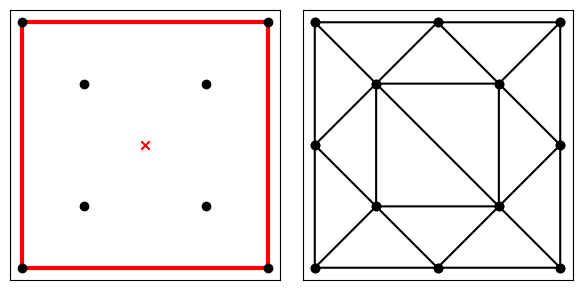

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1]], dtype=int32)

In [884]:
# Определение точек и сегментов
pts = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0.25, 0.25], [0.75, 0.25], [0.75, 0.75], [0.25, 0.75]])
seg = np.array([[0, 1], [1, 2], [2, 3], [3, 0]])

# Создание словаря с данными для триангуляции
data = dict(vertices=pts, segments=seg, holes=[[0.5, 0.5]])

# Триангуляция
triangulation = tr.triangulate(data, 'q')

# Извлечение координат вершин
vertices = triangulation['vertices']

# Извлечение сегментов (рёбер)
segments = triangulation['vertex_markers']

# Отображение триангуляции
tr.compare(plt, data, triangulation)
plt.show()

segments

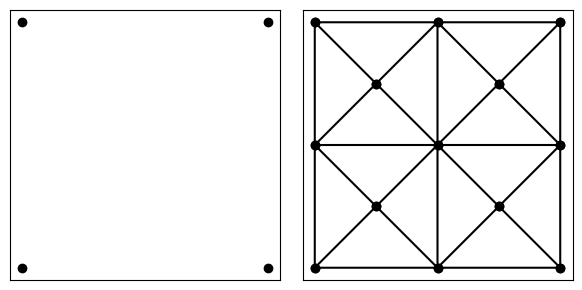

Координаты вершин:
Вершина 1: (0.0, 0.0)
Вершина 2: (1.0, 0.0)
Вершина 3: (1.0, 1.0)
Вершина 4: (0.0, 1.0)
Вершина 5: (0.5, 0.5)
Вершина 6: (0.0, 0.5)
Вершина 7: (0.5, 0.0)
Вершина 8: (0.5, 1.0)
Вершина 9: (0.25, 0.25)
Вершина 10: (1.0, 0.5)
Вершина 11: (0.25, 0.75)
Вершина 12: (0.75, 0.75)
Вершина 13: (0.75, 0.25)

Сегменты (рёбра):
Ребро 1: (0.5, 0.5) - (0.75, 0.25)
Ребро 2: (0.25, 0.25) - (0.5, 0.5)
Ребро 3: (0.25, 0.75) - (0.5, 1.0)
Ребро 4: (0.0, 1.0) - (0.0, 0.5)
Ребро 5: (0.75, 0.25) - (0.5, 0.5)
Ребро 6: (0.5, 0.5) - (0.25, 0.25)
Ребро 7: (0.0, 0.0) - (0.5, 0.0)
Ребро 8: (0.75, 0.75) - (1.0, 1.0)
Ребро 9: (0.0, 0.5) - (0.0, 0.0)
Ребро 10: (1.0, 0.5) - (1.0, 1.0)
Ребро 11: (0.5, 0.5) - (0.5, 1.0)
Ребро 12: (0.0, 0.5) - (0.5, 0.5)
Ребро 13: (0.5, 0.5) - (1.0, 0.5)
Ребро 14: (0.5, 1.0) - (0.5, 0.5)
Ребро 15: (1.0, 0.0) - (1.0, 0.5)
Ребро 16: (0.5, 0.0) - (1.0, 0.0)


In [893]:
# Определение точек
vertices = np.array(((0, 0), (1, 0), (1, 1), (0, 1)))

# Создание словаря с данными для триангуляции
data = dict(vertices=vertices)

# Триангуляция
triangulation = tr.triangulate(data, 'qa0.1')

# Извлечение координат вершин
tri_vertices = triangulation['vertices']

# Извлечение сегментов (рёбер)
tri_segments = triangulation['triangles']

# Отображение триангуляции
tr.compare(plt, data, triangulation)
plt.show()

# Вывод координат вершин
print("Координаты вершин:")
for i, vertex in enumerate(tri_vertices):
    print(f"Вершина {i + 1}: ({vertex[0]}, {vertex[1]})")

# Вывод сегментов (рёбер)
print("\nСегменты (рёбра):")
for i, segment in enumerate(tri_segments):
    print(f"Ребро {i + 1}: ({tri_vertices[segment[0]][0]}, {tri_vertices[segment[0]][1]}) - ({tri_vertices[segment[1]][0]}, {tri_vertices[segment[1]][1]})")


In [899]:
# Определение точек
vertices = np.array(((0, 0), (1, 0), (1, 1), (0, 1)))

# Создание словаря с данными для триангуляции
data = dict(vertices=vertices)

# Триангуляция
triangulation = tr.triangulate(data, 'qa0.1')

# Извлечение координат вершин
tri_vertices = triangulation['vertices']

# Извлечение индексов вершин для каждого треугольника
tri_triangles = triangulation['triangles']

# # Извлечение информации о соседних треугольниках
# neighbors = triangulation['neighbors']

# Вывод информации о треугольниках и их соседях
print("Информация о треугольниках и их соседях:")
for i, triangle in enumerate(tri_triangles):
    vertices_str = ", ".join([f"({tri_vertices[vertex][0]}, {tri_vertices[vertex][1]})" for vertex in triangle])
    # neighbor_indices = neighbors[i]
    # neighbors_str = ", ".join([str(neighbor) if neighbor != -1 else "None" for neighbor in neighbor_indices])
    print(f"Треугольник {i + 1}: вершины {vertices_str}")


Информация о треугольниках и их соседях:
Треугольник 1: вершины (0.5, 0.5), (0.75, 0.25), (1.0, 0.5)
Треугольник 2: вершины (0.25, 0.25), (0.5, 0.5), (0.0, 0.5)
Треугольник 3: вершины (0.25, 0.75), (0.5, 1.0), (0.0, 1.0)
Треугольник 4: вершины (0.0, 1.0), (0.0, 0.5), (0.25, 0.75)
Треугольник 5: вершины (0.75, 0.25), (0.5, 0.5), (0.5, 0.0)
Треугольник 6: вершины (0.5, 0.5), (0.25, 0.25), (0.5, 0.0)
Треугольник 7: вершины (0.0, 0.0), (0.5, 0.0), (0.25, 0.25)
Треугольник 8: вершины (0.75, 0.75), (1.0, 1.0), (0.5, 1.0)
Треугольник 9: вершины (0.0, 0.5), (0.0, 0.0), (0.25, 0.25)
Треугольник 10: вершины (1.0, 0.5), (1.0, 1.0), (0.75, 0.75)
Треугольник 11: вершины (0.5, 0.5), (0.5, 1.0), (0.25, 0.75)
Треугольник 12: вершины (0.0, 0.5), (0.5, 0.5), (0.25, 0.75)
Треугольник 13: вершины (0.5, 0.5), (1.0, 0.5), (0.75, 0.75)
Треугольник 14: вершины (0.5, 1.0), (0.5, 0.5), (0.75, 0.75)
Треугольник 15: вершины (1.0, 0.0), (1.0, 0.5), (0.75, 0.25)
Треугольник 16: вершины (0.5, 0.0), (1.0, 0.0), (0.75

In [900]:
triangulation

{'vertices': array([[0.  , 0.  ],
        [1.  , 0.  ],
        [1.  , 1.  ],
        [0.  , 1.  ],
        [0.5 , 0.5 ],
        [0.  , 0.5 ],
        [0.5 , 0.  ],
        [0.5 , 1.  ],
        [0.25, 0.25],
        [1.  , 0.5 ],
        [0.25, 0.75],
        [0.75, 0.75],
        [0.75, 0.25]]),
 'vertex_markers': array([[1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0]], dtype=int32),
 'triangles': array([[ 4, 12,  9],
        [ 8,  4,  5],
        [10,  7,  3],
        [ 3,  5, 10],
        [12,  4,  6],
        [ 4,  8,  6],
        [ 0,  6,  8],
        [11,  2,  7],
        [ 5,  0,  8],
        [ 9,  2, 11],
        [ 4,  7, 10],
        [ 5,  4, 10],
        [ 4,  9, 11],
        [ 7,  4, 11],
        [ 1,  9, 12],
        [ 6,  1, 12]], dtype=int32)}

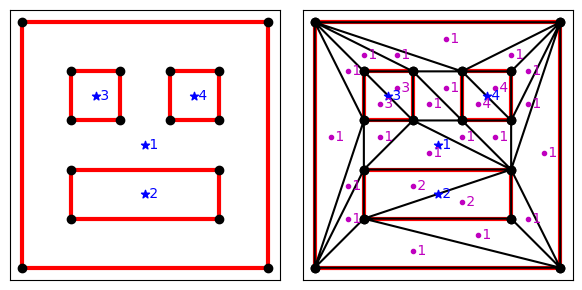

In [901]:
# arrays to fill in with input
vertices = []
segments = []
regions = []

# make a box with given dims and place given attribute at its center
def make_box(x, y, w, h, attribute):

    i = len(vertices)
    
    vertices.extend([[x,   y],
                     [x+w, y],
                     [x+w, y+h],
                     [x,   y+h]])

    segments.extend([(i+0, i+1),
                     (i+1, i+2),
                     (i+2, i+3),
                     (i+3, i+0)])
    
    regions.append([x+0.5*w, y+0.5*h, attribute, 0])

# generate some input    
make_box(0, 0, 5, 5, 1)
make_box(1, 1, 3, 1, 2)
make_box(1, 3, 1, 1, 3)
make_box(3, 3, 1, 1, 4)

A = dict(vertices=vertices, segments=segments, regions=regions)
B = tr.triangulate(A, 'pA')
    
tr.compare(plt, A, B)
plt.show()

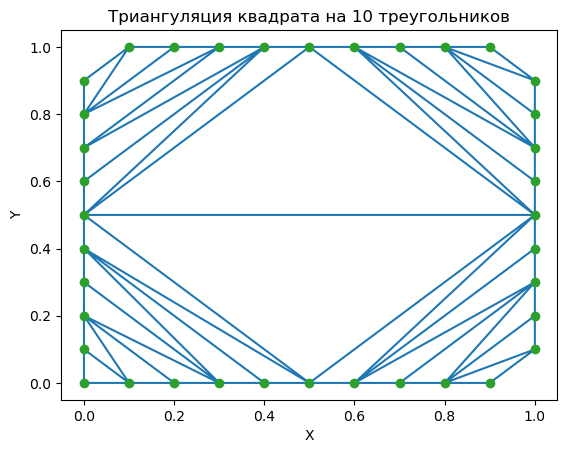

In [905]:

def generate_square_points(N):
    # Генерируем точки по вершинам квадрата
    vertices = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])

    # Создаем дополнительные точки на границе квадрата
    points = [vertices[0]]
    for i in range(1, N):
        points.append([i / N, 0])
    for i in range(1, N):
        points.append([1, i / N])
    for i in range(1, N):
        points.append([(N - i) / N, 1])
    for i in range(1, N):
        points.append([0, (N - i) / N])
    
    return np.array(points)

# Количество треугольников
N = 10

# Генерируем точки для триангуляции
points = generate_square_points(N)

# Строим триангуляцию Делоне
tri = Delaunay(points)

# Отображаем триангуляцию
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Триангуляция квадрата на {N} треугольников')
plt.show()
